In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [187]:
train=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/train.csv')
test=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/test.csv')
submit=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/sample_submission.csv')

In [ ]:
train

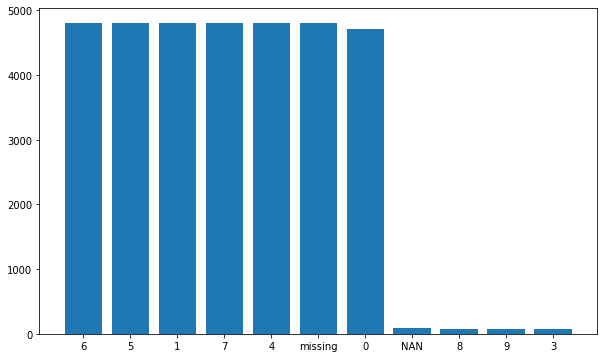

In [188]:
# 데이터 불균형
# 이상 label 발견. label의 object화. 즉, 숫자로 바꿔준다. 

temp=train['label'].value_counts()

fig,ax=plt.subplots(1,1,figsize=(10,6))

ax.bar(temp.index,temp)

plt.show()

In [ ]:
# https://stackoverflow.com/questions/2659312/how-do-i-convert-a-numpy-array-to-and-display-an-image

from PIL import Image

# test 0번 이상하다. 
# 데이터 분석을 포기한다. 
# 관건은 모델링인것 같다.

# test는 test끼리 비슷하고, train은 train끼리 비슷하다.
# 전처리를 바꿔줘야 할 듯 싶다.

fig,ax=plt.subplots(2,3,figsize=(15,10))

ax[0,0].imshow(Image.fromarray(train.iloc[33838][1:-1].to_numpy().reshape(28,28),'RGB'))
ax[0,0].set_title('train label - missing')

ax[0,1].imshow(Image.fromarray(train.iloc[3][1:-1].to_numpy().reshape(28,28),'RGB'))
ax[0,1].set_title('train label - NAN')

ax[0,2].imshow(Image.fromarray(train.iloc[1][1:-1].to_numpy().reshape(28,28),'RGB'))
ax[0,2].set_title('train label - 9')

ax[1,0].imshow(Image.fromarray(train.iloc[2][1:-1].to_numpy().reshape(28,28),'RGB'))
ax[1,0].set_title('train label - 6')

ax[1,1].imshow(Image.fromarray(test.iloc[0][1:].to_numpy().reshape(28,28),'RGB'))
ax[1,1].set_title('test id 11')

ax[1,2].imshow(Image.fromarray(test.iloc[1613][1:].to_numpy().reshape(28,28),'RGB'))
ax[1,2].set_title('test id 11327')

plt.show()

In [189]:
train['label'] = train['label'].apply(lambda x: np.nan if x=="missing" or x=='NAN' else x)
train

,id,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0,6
3,3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0,NaN
4,4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33835,59990,0,0,0,0,0,0,0,0,0,1,0,19,221,214,203,202,200,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8,0,0,0,0,...,242,229,223,240,104,0,6,0,0,0,0,0,0,0,0,0,4,0,19,184,181,170,173,170,169,171,170,161,158,154,161,165,83,0,5,0,0,0,0,0
33836,59991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
33837,59992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
33838,59993,0,0,0,0,0,0,1,0,0,0,56,0,0,0,0,0,112,51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,130,224,...,9,10,16,7,0,229,244,148,0,0,0,0,0,0,12,125,136,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,113,9,0,0,0,NaN


In [190]:
train=train.dropna()
train

,id,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0,6
4,4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0,3
5,5,0,0,0,5,4,5,5,3,5,6,2,0,0,0,0,0,0,0,2,3,7,4,4,5,5,0,0,0,0,0,0,4,5,4,5,11,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,4,9,7,8,7,5,4,8,12,5,7,8,7,4,3,7,5,0,0,0,4
6,6,0,0,0,0,0,0,0,0,0,0,0,0,159,161,143,180,142,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,231,241,217,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,36,50,51,68,48,48,33,14,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33834,59989,0,0,0,0,0,0,0,0,0,35,89,62,82,29,3,39,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,164,238,249,...,228,210,233,117,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,132,133,171,198,217,209,210,198,168,144,122,131,25,0,0,0,0,0,0,0,4
33835,59990,0,0,0,0,0,0,0,0,0,1,0,19,221,214,203,202,200,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8,0,0,0,0,...,242,229,223,240,104,0,6,0,0,0,0,0,0,0,0,0,4,0,19,184,181,170,173,170,169,171,170,161,158,154,161,165,83,0,5,0,0,0,0,0
33836,59991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
33837,59992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [191]:
X_train=train.drop('id',axis=1)
X_train=X_train.drop('label',axis=1)
y=train['label']
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
5,0,0,0,5,4,5,5,3,5,6,2,0,0,0,0,0,0,0,2,3,7,4,4,5,5,0,0,0,0,0,0,4,5,4,5,11,2,0,0,21,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,4,9,7,8,7,5,4,8,12,5,7,8,7,4,3,7,5,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,159,161,143,180,142,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,251,...,255,231,241,217,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,36,50,51,68,48,48,33,14,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33834,0,0,0,0,0,0,0,0,0,35,89,62,82,29,3,39,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,164,238,249,214,...,222,228,210,233,117,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,132,133,171,198,217,209,210,198,168,144,122,131,25,0,0,0,0,0,0,0
33835,0,0,0,0,0,0,0,0,0,1,0,19,221,214,203,202,200,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8,0,0,0,0,244,...,245,242,229,223,240,104,0,6,0,0,0,0,0,0,0,0,0,4,0,19,184,181,170,173,170,169,171,170,161,158,154,161,165,83,0,5,0,0,0,0
33836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [192]:
picture=X_train.values

In [193]:
picture = picture.reshape((-1,28,28))

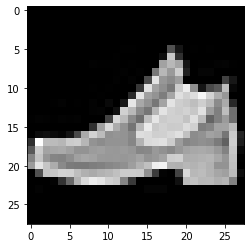

In [194]:
plt.imshow(picture[0], cmap='gray')

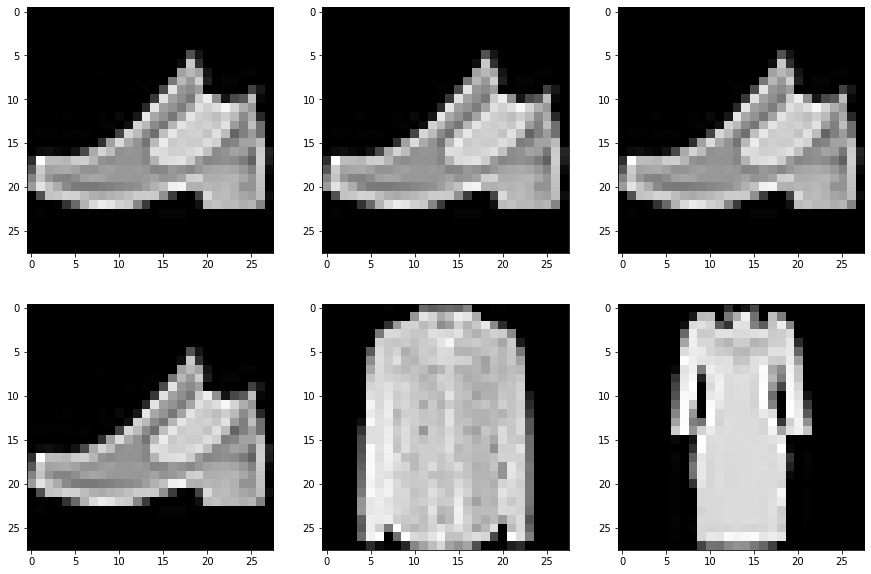

In [195]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
for i in range(2):
  for j in range(3):
    ax[i,j].imshow(picture[i*j],cmap='gray')

#데이터 전처리

데이터 불균형 처리를 위한 oversampling

In [196]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

label에 2 가없네 ;; labelencoder 로 다시 라벨링

In [197]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y_res)

In [199]:
y[0:50]

array([8, 5, 2, 3, 3, 4, 3, 7, 8, 8, 2, 2, 7, 3, 3, 3, 7, 6, 1, 4, 4, 2,
       6, 3, 5, 8, 5, 4, 5, 6, 6, 3, 1, 3, 8, 7, 2, 3, 4, 4, 5, 2, 4, 7,
       4, 8, 7, 1, 7, 2])

layer에 집어넣기 위해 reshape 
-> kreas 에서는 channel_last방식으로 (sample, width,height,channel)형태로 입력되어야함
그리고 grayscale image니까 각 픽셀을 255로 나누어줌 (정규화였나)

In [200]:
X_res = X_res.astype('float32')/255

In [201]:
X_res = pd.DataFrame(X_res)
X_ovr = X_res.values
X_train_ovr = X_ovr.reshape(-1,28,28,1)

In [202]:
X_train_ovr.shape

(43200, 28, 28, 1)

In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_ovr,y,test_size=0.2, stratify = y)

In [204]:
y_train.shape

(34560,)

#Model Struct using tensorflow keras


In [205]:
import tensorflow as tf
import keras 
from keras import layers
from keras import models
from keras.layers import *
model1 = models.Sequential()
model1.add(layers.Conv2D(16,(3,3),activation='relu',input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]),name='conv2d_layer1'))
model1.add(layers.Conv2D(32,(3,3),activation='relu',name='conv2d_layer2'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(3,3),activation='relu',name='conv2d_layer3'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128,(3,3),activation='relu',name='conv2d_layer4'))
model1.add(layers.Flatten())
model1.add(Dense(128,activation = 'relu'))
model1.add(Dense(64,activation = 'relu'))
model1.add(Dense(16,activation = 'relu'))
model1.add(Dense(1,activation='softmax'))

In [206]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_layer1 (Conv2D)       (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_layer2 (Conv2D)       (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_layer3 (Conv2D)       (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_layer4 (Conv2D)       (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1152)            

In [ ]:
model1.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model1.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
 123/1080 [==>...........................] - ETA: 52s - loss: 0.0000e+00 - accuracy: 0.1238